<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-05 19:43:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.9MB/s    in 2.5s    

2025-04-05 19:43:13 (60.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [3]:
#select variable
df_agevspart = df[['Age','SOPartFreq','JobSat']]

In [4]:
#check for missing values
(df_agevspart.isnull().sum())

Age               0
SOPartFreq    20200
JobSat        36311
dtype: int64

In [5]:
#check unique value for SOPartFreq
df_agevspart['SOPartFreq'].unique()

array([nan, 'Multiple times per day', 'Daily or almost daily',
       'Less than once per month or monthly', 'A few times per week',
       'A few times per month or weekly',
       'I have never participated in Q&A on Stack Overflow'], dtype=object)

In [6]:
#check for unique value for JobSat
df_agevspart['JobSat'].unique()

array([nan,  8.,  5., 10.,  6.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

In [7]:
#check for unique value for Age
df_agevspart['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [8]:
#remove NaN and check for removal
df_agevspart_filtered = df_agevspart.dropna(subset=['JobSat','SOPartFreq'])
(df_agevspart_filtered.isnull().sum())

Age           0
SOPartFreq    0
JobSat        0
dtype: int64

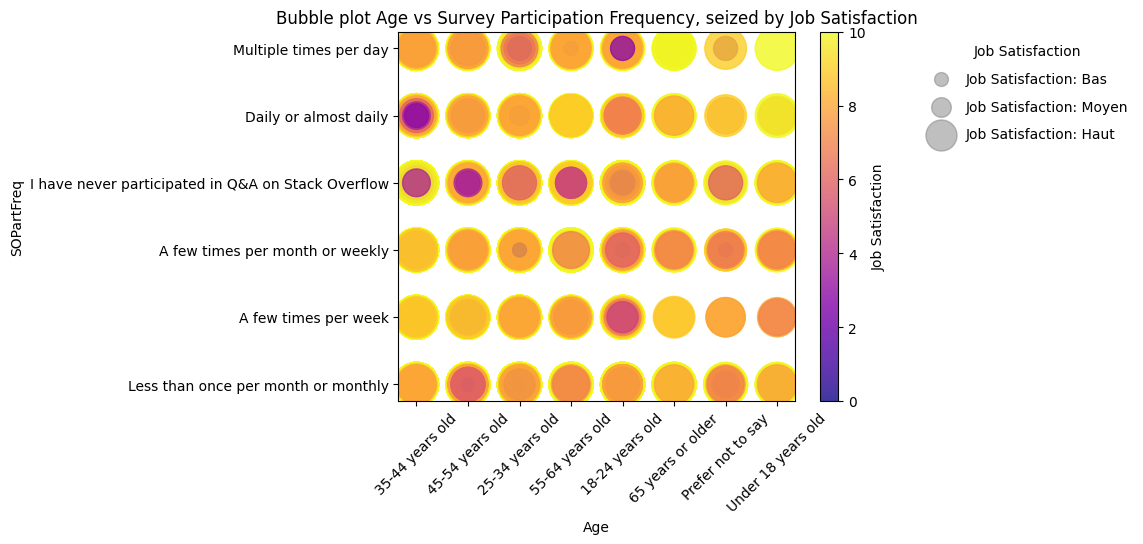

In [10]:
#plot the scatter plot
x=df_agevspart_filtered['Age']
y=df_agevspart_filtered['SOPartFreq']
size=df_agevspart_filtered['JobSat']

scatter =plt.scatter(x,y,
            s=size*100,c=df_agevspart_filtered['JobSat'],cmap='plasma',alpha=0.8) 
plt.title('Bubble plot Age vs Survey Participation Frequency, seized by Job Satisfaction') 
# Add a legend for bubble size
sizes = [100, 200, 500]
labels = ['Bas', 'Moyen', 'Haut']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size,c='gray', alpha=0.5, label=f'Job Satisfaction: {label}')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Job Satisfaction') 
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Job Satisfaction',
           bbox_to_anchor=(1.3, 1), loc='upper left')
plt.xlabel('Age') 
plt.xticks(rotation=45)
plt.ylabel('SOPartFreq')
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [11]:
#select the variables
df_comp=df[['ConvertedCompYearly','JobSat','Age']]

In [12]:
#check for missing values
(df_comp.isnull().sum())

ConvertedCompYearly    42002
JobSat                 36311
Age                        0
dtype: int64

In [13]:
#remove NaN and check for removal
df_comp_filtered = df_comp.dropna(subset=['JobSat','ConvertedCompYearly'])
(df_comp_filtered.isnull().sum())

ConvertedCompYearly    0
JobSat                 0
Age                    0
dtype: int64

In [14]:
#set the higher outlier limit for ConvertedCompYearly
Q3=df_comp_filtered['ConvertedCompYearly'].quantile(0.75) 
Q1=df_comp_filtered['ConvertedCompYearly'].quantile(0.25)  
IQR = Q3-Q1 
higher_outlier = Q3+1.5*IQR 
higher_outlier

np.float64(220346.5)

In [15]:
#filter the ConvertedCompYearly to remove outliers
df_comp_filtered = df_comp_filtered[df_comp_filtered['ConvertedCompYearly']<higher_outlier]

In [16]:
#check the number of rows for df
df_comp_filtered.shape

(15437, 3)

In [17]:
#normalize ConvertedCompYearly
comp_min = df_comp_filtered['ConvertedCompYearly'].min()
comp_max = df_comp_filtered['ConvertedCompYearly'].max()
df_comp_filtered['ConvertedCompYearly_norm']=(df_comp_filtered['ConvertedCompYearly']-comp_min)/(comp_max-comp_min) 
df_comp_filtered['ConvertedCompYearly_norm'].mean()

np.float64(0.3271135394147954)

In [18]:
#Convert Age to numerical variable
import numpy as np
def age_quantitative (age):
    if age =='Prefer not to say':
        return np.nan
    if age =='Under 18 years old' :
        return 17
    elif age =='35-44 years old':
        return (35+44)/2
    elif age =='45-54 years old':
        return (45+54)/2
    elif age =='18-24 years old':
        return (18+24)/2 
    elif age =='25-34 years old': 
        return (25+34)/2
    elif age =='55-64 years old': 
        return (55+64)/2 
    elif age =='65 years or older':  
        return 66

#Apply the function
df_comp_filtered['Age'] = df_comp_filtered['Age'].apply(age_quantitative)

In [19]:
#check for unique value Age after applying function
df_comp_filtered['Age'].unique()

array([21. , 39.5, 29.5, 49.5, 59.5, 66. , 17. ,  nan])

In [20]:
#check for missing values
(df_comp_filtered['Age'].isnull().sum())

np.int64(7)

In [21]:
#remove NaN and check for removal
df_comp_filtered = df_comp_filtered.dropna(subset=['Age'])
(df_comp_filtered['Age'].isnull().sum())

np.int64(0)

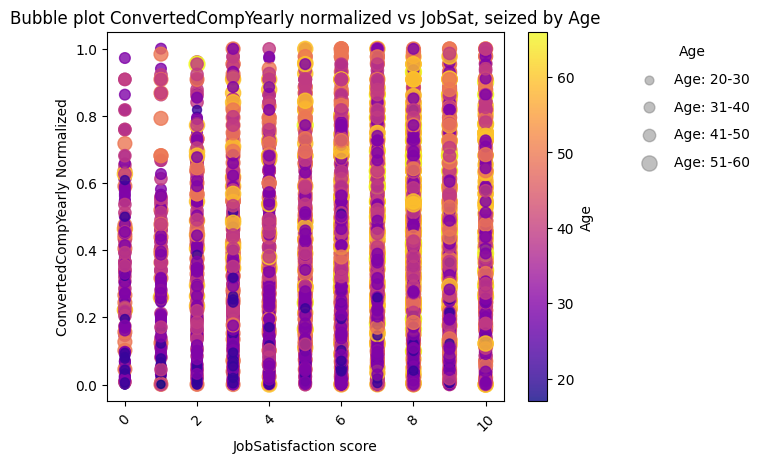

In [23]:
#plot the bubble plot
x=df_comp_filtered['JobSat']
y=df_comp_filtered['ConvertedCompYearly_norm']
size=df_comp_filtered['Age']

scatter =plt.scatter(x,y,
            s=size*2,c=df_comp_filtered['Age'],cmap='plasma',alpha=0.8) 
plt.title('Bubble plot ConvertedCompYearly normalized vs JobSat, seized by Age') 
# Add a legend for the bubble size
sizes = [40, 60, 80, 120, 180]
labels = ['20-30', '31-40', '41-50','51-60']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size,c='gray', alpha=0.5, label=f'Age: {label}')

# Ajout d'une barre de couleurs
cbar = plt.colorbar(scatter)
cbar.set_label('Age') 
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Age',
           bbox_to_anchor=(1.3, 1), loc='upper left')
plt.xlabel('JobSatisfaction score') 
plt.xticks(rotation=45)
plt.ylabel('ConvertedCompYearly Normalized')
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [24]:
#select variables
df_language = df[['LanguageHaveWorkedWith','Age','ResponseId']]

In [25]:
#split Language variable 
df_language['LanguageHaveWorkedWith'] = df_language['LanguageHaveWorkedWith'].str.split(';')
df_language_exploded = df_language.explode('LanguageHaveWorkedWith')

/tmp/ipykernel_1087/123687275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_language['LanguageHaveWorkedWith'] = df_language['LanguageHaveWorkedWith'].str.split(';')


In [26]:
df_language_exploded.head()

,LanguageHaveWorkedWith,Age,ResponseId
0,NaN,Under 18 years old,1
1,Bash/Shell (all shells),35-44 years old,2
1,Go,35-44 years old,2
1,HTML/CSS,35-44 years old,2
1,Java,35-44 years old,2


In [27]:
# Calculate the frequency of each Language
langage_counts = df_language_exploded['LanguageHaveWorkedWith'].value_counts()

# Top 10 languages
top_10_langages = langage_counts.head(10).index
top_10_langages

Index(['JavaScript', 'HTML/CSS', 'Python', 'SQL', 'TypeScript',
       'Bash/Shell (all shells)', 'Java', 'C#', 'C++', 'C'],
      dtype='object', name='LanguageHaveWorkedWith')

In [28]:
# Filter data to kept the top 10 languages
df_filtered = df_language_exploded[df_language_exploded['LanguageHaveWorkedWith'].isin(top_10_langages)]

In [29]:
# groupby Age and calculate the count of Respondents for each Language
df_grouped = df_filtered.groupby(['Age', 'LanguageHaveWorkedWith']).agg(Frequency=('ResponseId', 'count')).reset_index()

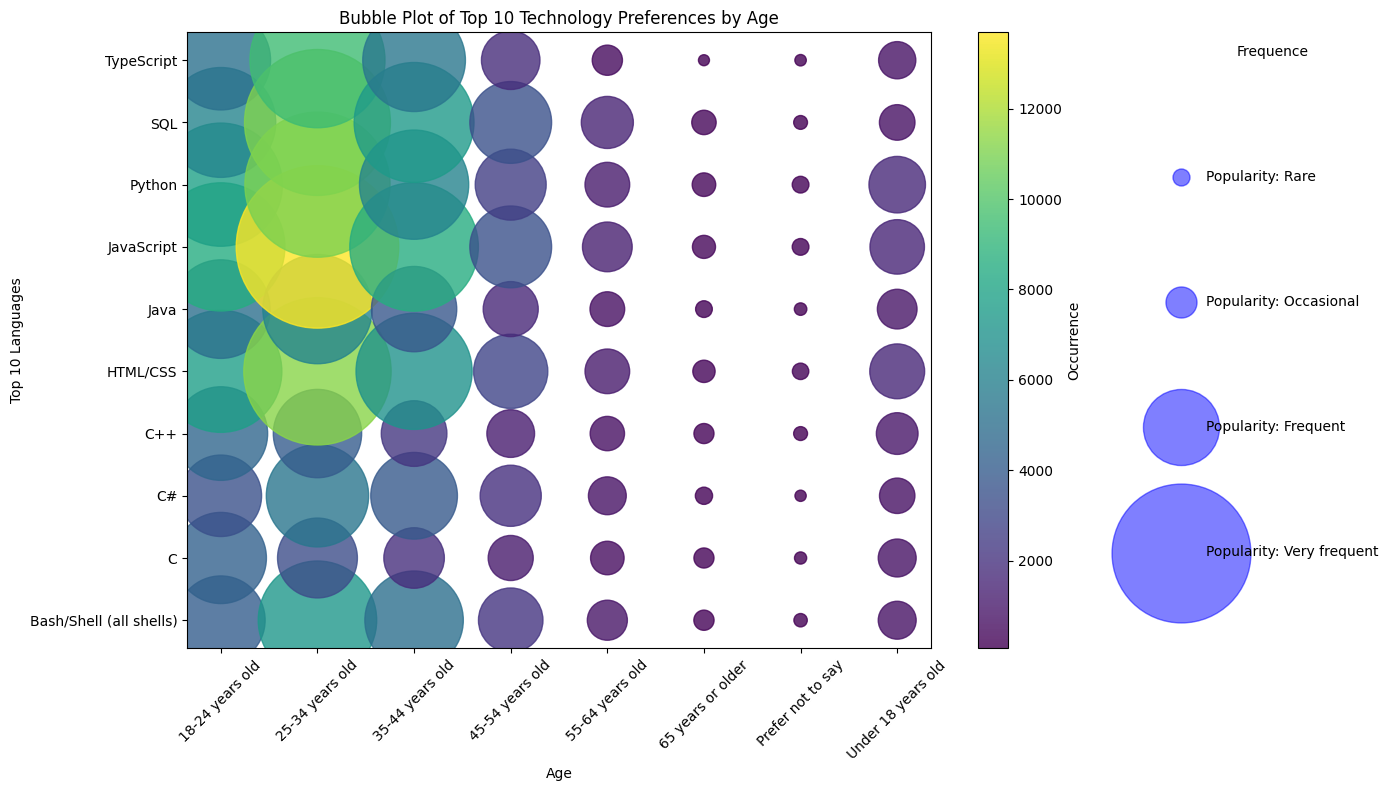

In [31]:
#plot the bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_grouped['Age'], df_grouped['LanguageHaveWorkedWith'], 
                       s=df_grouped['Frequency'],  # Amplification des tailles
                       alpha=0.8, cmap='viridis', c=df_grouped['Frequency'])

# color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Occurrence')
# Ajouter une légende pour la taille des bulles
sizes = [150, 500, 3000,10000]
labels = ['Rare','Occasional','Frequent','Very frequent']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size,c='blue', alpha=0.5, label=f'Popularity: {label}')

plt.legend(scatterpoints=1, frameon=False, labelspacing=8, title='Frequence',
           bbox_to_anchor=(1.3, 1), loc='upper left')
plt.xlabel('Age')
plt.ylabel('Top 10 Languages')
plt.title('Bubble Plot of Top 10 Technology Preferences by Age')
plt.xticks(rotation=45)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [32]:
#select data and check for NaN
df_database = df[['DatabaseWantToWorkWith','JobSat','ResponseId']] 
(df_database.isnull().sum())

DatabaseWantToWorkWith    22879
JobSat                    36311
ResponseId                    0
dtype: int64

In [33]:
#check for unique data in JobSat
df_database['JobSat'].unique()

array([nan,  8.,  5., 10.,  6.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

In [57]:
df_database['DatabaseWantToWorkWith'].head()

0                           NaN
1                    PostgreSQL
2    Firebase Realtime Database
3      MongoDB;MySQL;PostgreSQL
4             PostgreSQL;SQLite
Name: DatabaseWantToWorkWith, dtype: object

In [34]:
#split DB variable 
df_database['DatabaseWantToWorkWith'] = df_database['DatabaseWantToWorkWith'].str.split(';')
df_database_exploded = df_database.explode('DatabaseWantToWorkWith')

/tmp/ipykernel_1087/2077506943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_database['DatabaseWantToWorkWith'] = df_database['DatabaseWantToWorkWith'].str.split(';')


In [35]:
#check unique entry for DatabaseWantToWorkWith
df_database_exploded['DatabaseWantToWorkWith'].unique()

array([nan, 'PostgreSQL', 'Firebase Realtime Database', 'MongoDB',
       'MySQL', 'SQLite', 'Cloud Firestore', 'Supabase', 'Redis',
       'Elasticsearch', 'Microsoft SQL Server', 'Oracle', 'MariaDB',
       'Presto', 'Dynamodb', 'Cosmos DB', 'Microsoft Access', 'DuckDB',
       'Cassandra', 'Clickhouse', 'H2', 'Neo4J', 'Cockroachdb',
       'Couch DB', 'RavenDB', 'BigQuery', 'Databricks SQL', 'Firebird',
       'Snowflake', 'Datomic', 'IBM DB2', 'InfluxDB', 'EventStoreDB',
       'Couchbase', 'Solr', 'TiDB'], dtype=object)

In [36]:
# Calculate the occurrence of each Database
db_counts = df_database_exploded['DatabaseWantToWorkWith'].value_counts()

# Top 10 filter
top_10_databases = db_counts.head(10).index
top_10_databases

Index(['PostgreSQL', 'SQLite', 'MySQL', 'MongoDB', 'Redis',
       'Microsoft SQL Server', 'Elasticsearch', 'MariaDB', 'Dynamodb',
       'Supabase'],
      dtype='object', name='DatabaseWantToWorkWith')

In [37]:
# Filter the top 10 databases
df_db_filtered = df_database_exploded[df_database_exploded['DatabaseWantToWorkWith'].isin(top_10_databases)]

In [38]:
# Group by Age and calculate the number of respondents by databases
df_db_grouped = df_db_filtered.groupby(['JobSat', 'DatabaseWantToWorkWith']).agg(Frequency=('ResponseId', 'count')).reset_index()

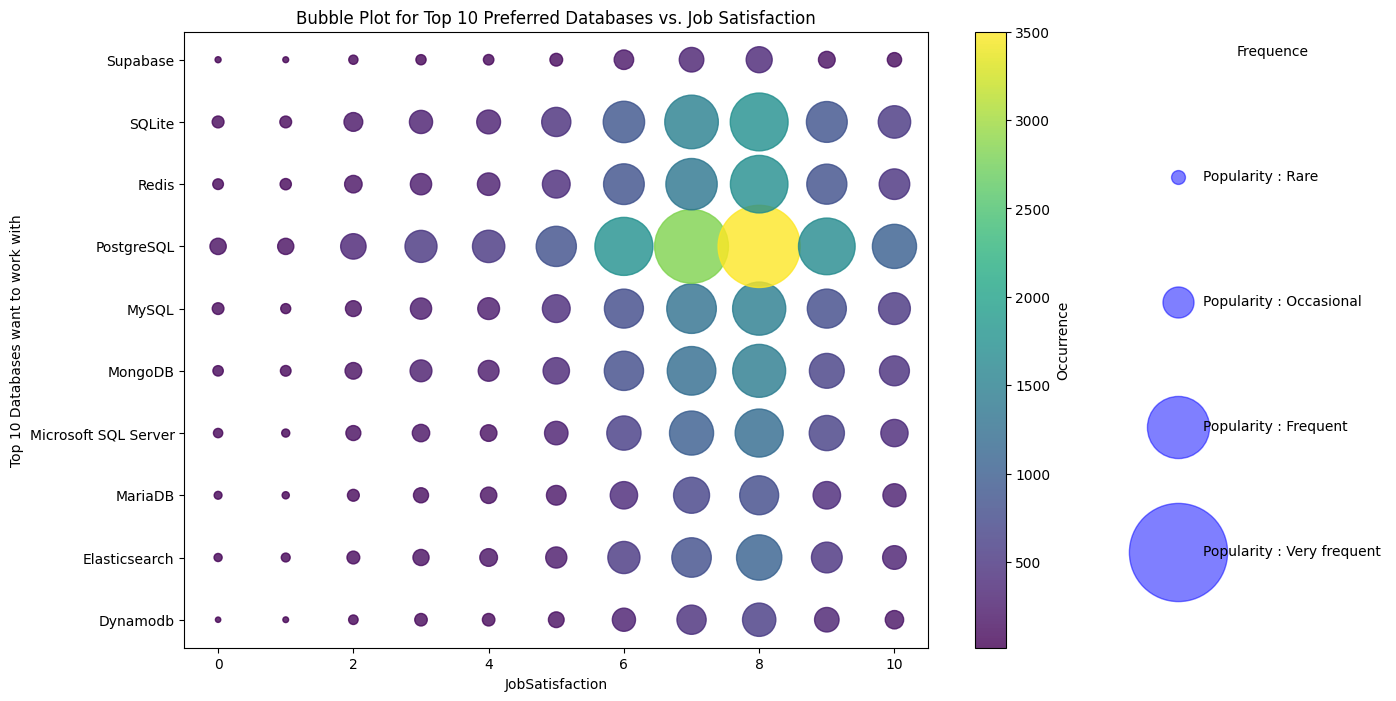

In [39]:
#plot the bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_db_grouped['JobSat'], df_db_grouped['DatabaseWantToWorkWith'], 
                       s=df_db_grouped['Frequency'],  # Amplify the size of the bubble
                       alpha=0.8, cmap='viridis', c=df_db_grouped['Frequency'])

# color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Occurrence')
# Add a legend for the bubble size
sizes = [100, 500, 2000,5000]
labels = ['Rare','Occasional','Frequent','Very frequent']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size,c='blue', alpha=0.5, label=f'Popularity : {label}')

plt.legend(scatterpoints=1, frameon=False, labelspacing=8, title='Frequence',
           bbox_to_anchor=(1.3, 1), loc='upper left')

plt.xlabel('JobSatisfaction')
plt.ylabel('Top 10 Databases want to work with')
plt.title('Bubble Plot for Top 10 Preferred Databases vs. Job Satisfaction')
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [40]:
#select data
df_devtype = df[['ConvertedCompYearly','DevType','JobSat','ResponseId']]

In [41]:
#check unique entry for DevType
df_devtype['DevType'].unique()

array([nan, 'Developer, full-stack', 'Developer Experience', 'Student',
       'Academic researcher', 'Project manager', 'Developer Advocate',
       'Developer, back-end', 'Other (please specify):',
       'Developer, front-end', 'Database administrator',
       'Developer, desktop or enterprise applications',
       'Cloud infrastructure engineer',
       'Data scientist or machine learning specialist',
       'Research & Development role',
       'Developer, embedded applications or devices',
       'System administrator', 'DevOps specialist', 'Engineering manager',
       'Designer', 'Security professional',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer, mobile',
       'Developer, game or graphics', 'Data or business analyst',
       'Educator', 'Developer, QA or test', 'Product manager',
       'Developer, AI', 'Scientist', 'Engineer, site reliability',
       'Blockchain', 'Marketing or sales professional',
       'Hardware Engineer', 'Data engineer'], dtype=object)

In [42]:
#TOP 10 developer role
# Calculate the occurrence of each DevType
developer_counts = df_devtype['DevType'].value_counts()

# Top 10 filter
top_10_developer = developer_counts.head(10).index
top_10_developer

Index(['Developer, full-stack', 'Developer, back-end', 'Student',
       'Developer, front-end', 'Developer, desktop or enterprise applications',
       'Other (please specify):', 'Developer, mobile',
       'Developer, embedded applications or devices', 'Engineering manager',
       'Academic researcher'],
      dtype='object', name='DevType')

In [43]:
# Filter top 10 DevType
df_developer_filtered = df_devtype[df_devtype['DevType'].isin(top_10_developer)]

In [44]:
#check for missing value
(df_developer_filtered.isnull().sum())

ConvertedCompYearly    28947
DevType                    0
JobSat                 24375
ResponseId                 0
dtype: int64

In [45]:
#outliers limit for ConvertedCompYearly
Q3=df_developer_filtered['ConvertedCompYearly'].quantile(0.75) 
Q1=df_developer_filtered['ConvertedCompYearly'].quantile(0.25)  
IQR = Q3-Q1 
higher_outlier = Q3+1.5*IQR 
higher_outlier

np.float64(214497.75)

In [46]:
#filter df to remove outliers
df_developer_filtered = df_developer_filtered[df_developer_filtered['ConvertedCompYearly']<higher_outlier]

In [47]:
#normalize ConvertedCompYearly
dev_min = df_developer_filtered['ConvertedCompYearly'].min()
dev_max = df_developer_filtered['ConvertedCompYearly'].max()
df_developer_filtered['ConvertedCompYearly_norm']=(df_developer_filtered['ConvertedCompYearly']-dev_min)/(dev_max-dev_min) 
df_developer_filtered['ConvertedCompYearly_norm'].mean()

/tmp/ipykernel_1087/1199759129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developer_filtered['ConvertedCompYearly_norm']=(df_developer_filtered['ConvertedCompYearly']-dev_min)/(dev_max-dev_min)


np.float64(0.32129552367435193)

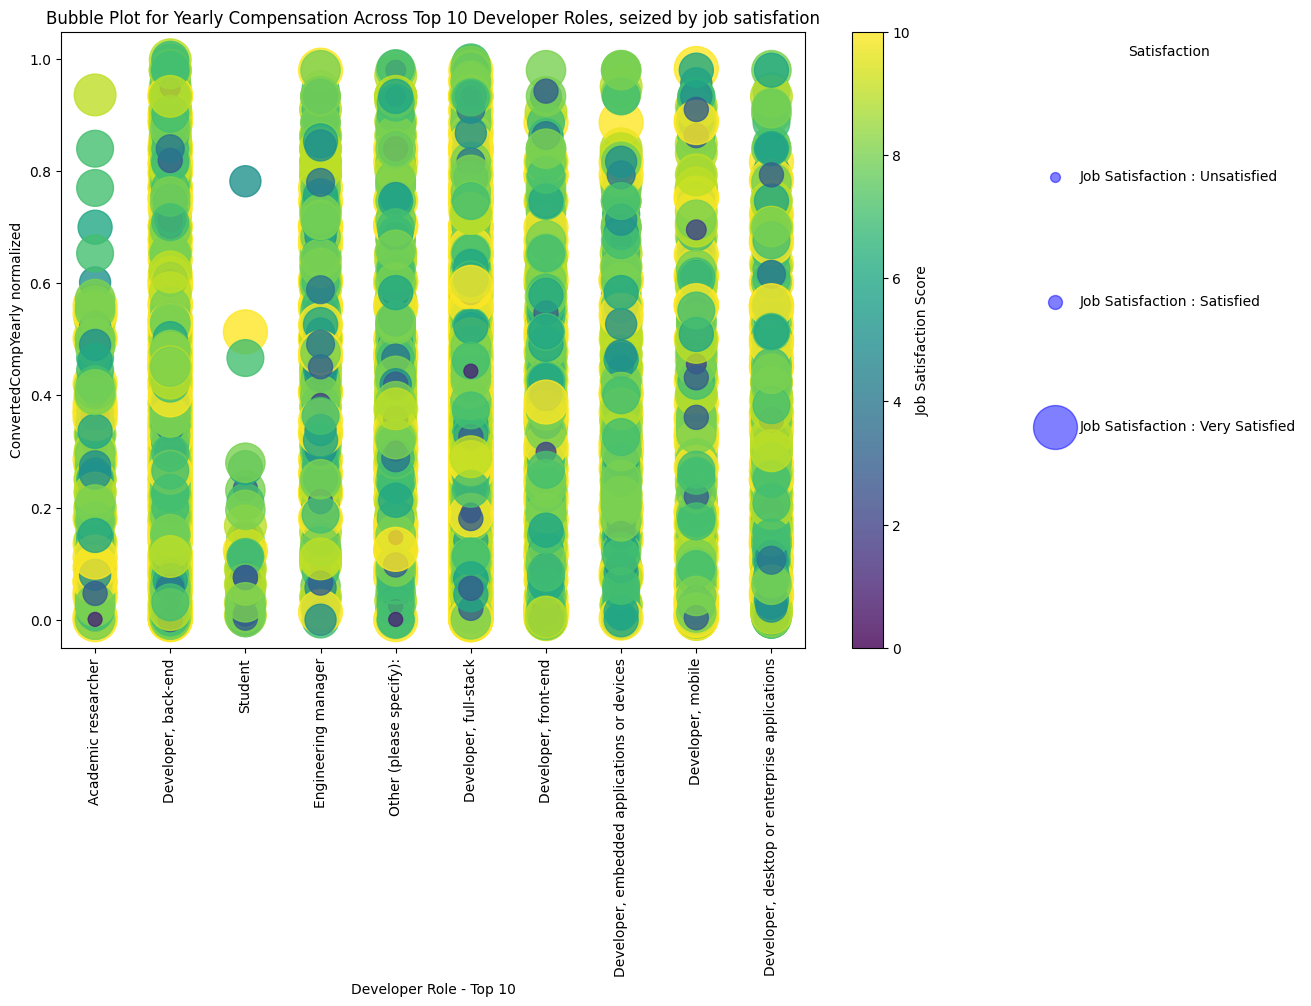

In [49]:
#plot bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_developer_filtered['DevType'], df_developer_filtered['ConvertedCompYearly_norm'], 
                       s=df_developer_filtered['JobSat']*100,  #amplify the bubble size
                       alpha=0.8, cmap='viridis', c=df_developer_filtered['JobSat'])

# color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Job Satisfaction Score')
#add legend to set bubble size
sizes = [50, 100, 1000]
labels = ['Unsatisfied','Satisfied','Very Satisfied']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size,c='blue', alpha=0.5, label=f'Job Satisfaction : {label}')

plt.legend(scatterpoints=1, frameon=False, labelspacing=8, title='Satisfaction',
           bbox_to_anchor=(1.3, 1), loc='upper left')

plt.xlabel('Developer Role - Top 10')
plt.ylabel('ConvertedCompYearly normalized')
plt.title('Bubble Plot for Yearly Compensation Across Top 10 Developer Roles, seized by job satisfation')
plt.xticks(rotation=90)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [50]:
#select data
df_tools=df[['NEWCollabToolsHaveWorkedWith','Age','ResponseId']]

In [51]:
#check for unique entry
df_tools['NEWCollabToolsHaveWorkedWith'].unique()

array([nan, 'PyCharm;Visual Studio Code;WebStorm', 'Visual Studio', ...,
       'Android Studio;IntelliJ IDEA;Jupyter Notebook/JupyterLab;Neovim;PyCharm;Visual Studio Code',
       'PhpStorm;RubyMine;Vim;Visual Studio Code;WebStorm',
       'DataGrip;IntelliJ IDEA;PyCharm;Rider;Sublime Text;Vim;Visual Studio;Visual Studio Code;WebStorm;Xcode'],
      shape=(14169,), dtype=object)

In [52]:
#split tools variable 
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools_exploded = df_tools.explode('NEWCollabToolsHaveWorkedWith')

/tmp/ipykernel_1087/1235576927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')


In [53]:
#check for unique entry after split
df_tools_exploded['NEWCollabToolsHaveWorkedWith'].unique()

array([nan, 'PyCharm', 'Visual Studio Code', 'WebStorm', 'Visual Studio',
       'Vim', 'Nano', 'Xcode', 'RStudio', 'Android Studio',
       'IntelliJ IDEA', 'Netbeans', 'Notepad++', 'Sublime Text',
       'Eclipse', 'VSCodium', 'Kate', 'Jupyter Notebook/JupyterLab',
       'Rider', 'Emacs', 'Neovim', 'DataGrip', 'IPython', 'RubyMine',
       'Geany', 'Rad Studio (Delphi, C++ Builder)', 'CLion', 'Fleet',
       'Code::Blocks', 'Qt Creator', 'PhpStorm', 'BBEdit', 'Goland',
       'Spacemacs', 'Helix', 'Spyder'], dtype=object)

In [54]:
#Calculate the occurrence of each tools
tools_counts = df_tools_exploded['NEWCollabToolsHaveWorkedWith'].value_counts()

#Top 10 tools
top_10_tools = tools_counts.head(10).index
top_10_tools

Index(['Visual Studio Code', 'Visual Studio', 'IntelliJ IDEA', 'Notepad++',
       'Vim', 'Android Studio', 'PyCharm', 'Jupyter Notebook/JupyterLab',
       'Neovim', 'Sublime Text'],
      dtype='object', name='NEWCollabToolsHaveWorkedWith')

In [55]:
# Filter top 10 as a df
df_tools_filtered = df_tools_exploded[df_tools_exploded['NEWCollabToolsHaveWorkedWith'].isin(top_10_tools)]

In [56]:
#groupby Age, count the number of respondents for each tool
df_tools_grouped = df_tools_filtered.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).agg(Frequency=('ResponseId', 'count')).reset_index()

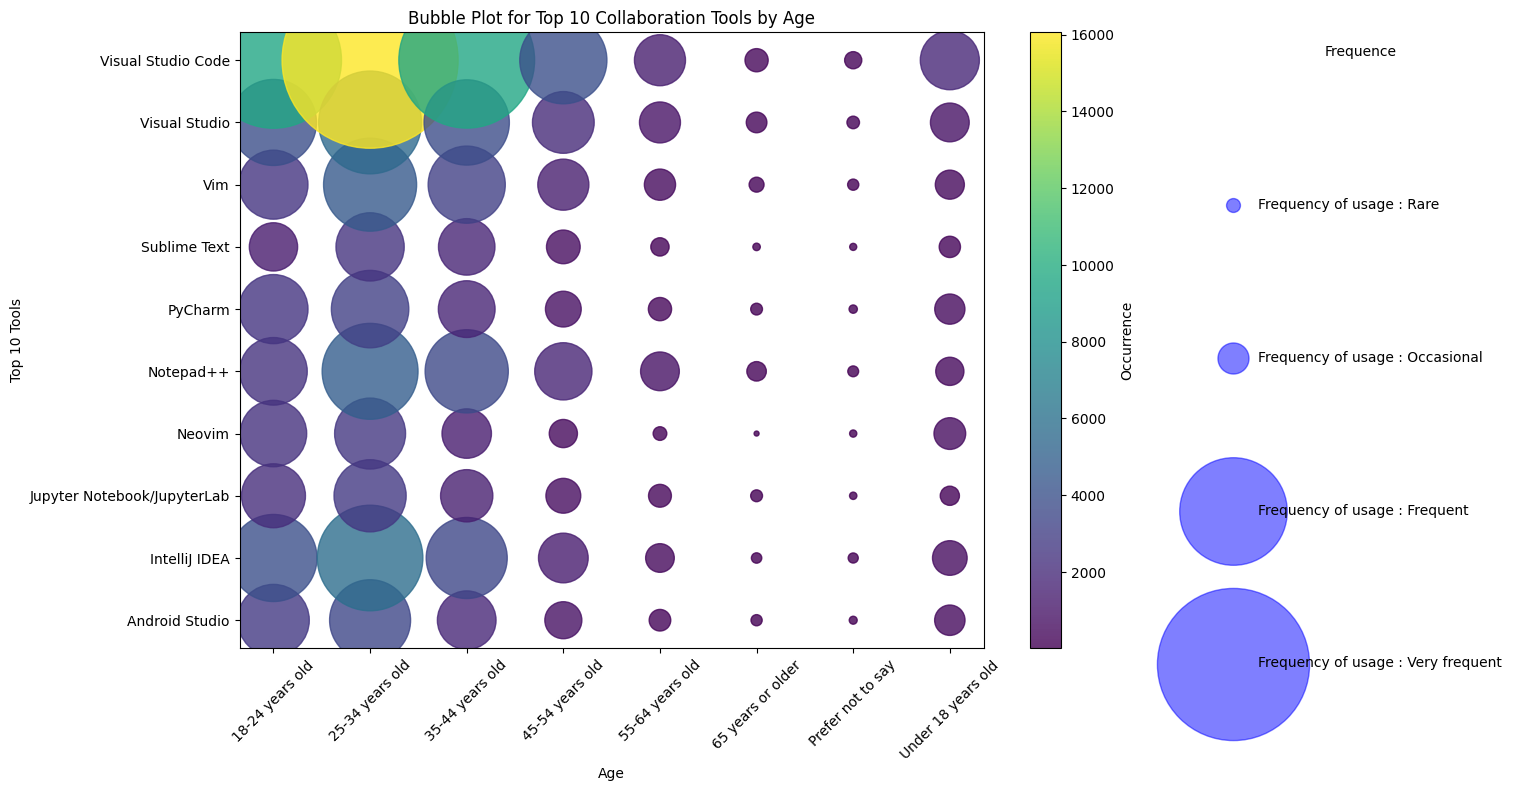

In [58]:
#bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_tools_grouped['Age'], df_tools_grouped['NEWCollabToolsHaveWorkedWith'], 
                       s=df_tools_grouped['Frequency'],  
                       alpha=0.8, cmap='viridis', c=df_tools_grouped['Frequency'])

# color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Occurrence')
#add legend for the bubble size
sizes = [100, 500, 6000,12000]
labels = ['Rare','Occasional','Frequent','Very frequent']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size,c='blue', alpha=0.5, label=f'Frequency of usage : {label}')

plt.legend(scatterpoints=1, frameon=False, labelspacing=10, title='Frequence',
           bbox_to_anchor=(1.3, 1), loc='upper left')

# Étiquettes et titre
plt.xlabel('Age')
plt.ylabel('Top 10 Tools')
plt.title('Bubble Plot for Top 10 Collaboration Tools by Age')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [59]:
#select data
df_frame=df[['WebframeWantToWorkWith','JobSat','ResponseId']] 

In [60]:
#check for unique entry
df_frame['WebframeWantToWorkWith'].unique()

array([nan, 'Express;Htmx;Node.js;React;Remix', 'ASP.NET CORE', ...,
       'Deno;Express;Fastify;Flask;NestJS;Node.js',
       'ASP.NET;Laravel;React;Spring Boot',
       'Django;Express;Laravel;NestJS;Next.js;Node.js;Nuxt.js;React;Spring Boot;Symfony;Vue.js;WordPress'],
      shape=(11655,), dtype=object)

In [61]:
#split tools variable 
df_frame['WebframeWantToWorkWith'] = df_frame['WebframeWantToWorkWith'].str.split(';')
df_frame_exploded = df_frame.explode('WebframeWantToWorkWith')

/tmp/ipykernel_1087/3825739018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frame['WebframeWantToWorkWith'] = df_frame['WebframeWantToWorkWith'].str.split(';')


In [62]:
#check for unique entry after split
df_frame_exploded['WebframeWantToWorkWith'].unique()

array([nan, 'Express', 'Htmx', 'Node.js', 'React', 'Remix',
       'ASP.NET CORE', 'jQuery', 'Next.js', 'Django', 'Ruby on Rails',
       'ASP.NET', 'Blazor', 'Deno', 'Solid.js', 'Angular', 'Laravel',
       'WordPress', 'AngularJS', 'Vue.js', 'Flask', 'CodeIgniter',
       'FastAPI', 'Spring Boot', 'Phoenix', 'Svelte', 'Astro', 'Nuxt.js',
       'Fastify', 'NestJS', 'Symfony', 'Drupal', 'Strapi', 'Elm',
       'Play Framework', 'Gatsby', 'Yii 2'], dtype=object)

In [63]:
#check for number of rows
df_frame_exploded.shape

(160159, 3)

In [64]:
# Calculate the count of each unique webframe
webframe_counts = df_frame_exploded['WebframeWantToWorkWith'].value_counts()

#Top 10 filtrer
top_10_webframe = webframe_counts.head(10).index
top_10_webframe

Index(['React', 'Node.js', 'Next.js', 'Vue.js', 'ASP.NET CORE', 'Angular',
       'Express', 'Svelte', 'Spring Boot', 'Django'],
      dtype='object', name='WebframeWantToWorkWith')

In [65]:
#filter the df for top 10 as a df
df_frame_filtered = df_frame_exploded[df_frame_exploded['WebframeWantToWorkWith'].isin(top_10_webframe)]

In [66]:
#check for number of rows
df_frame_filtered.shape

(80550, 3)

In [67]:
# groupby JobSat, and count number of respondent by webframe
df_frame_grouped = df_frame_filtered.groupby(['JobSat', 'WebframeWantToWorkWith']).agg(Frequency=('ResponseId', 'count')).reset_index()

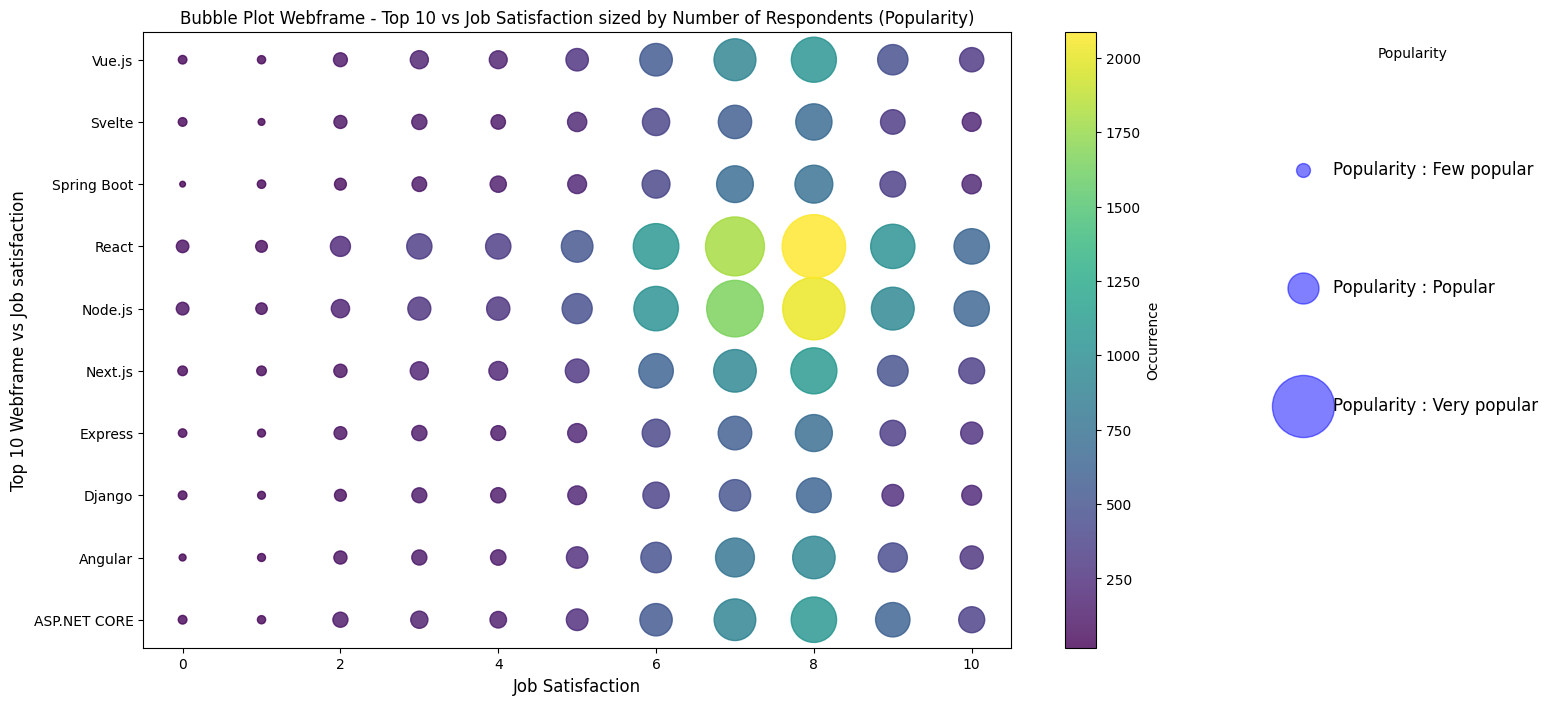

In [68]:
#bubble plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(df_frame_grouped['JobSat'], df_frame_grouped['WebframeWantToWorkWith'], 
                       s=df_frame_grouped['Frequency'], 
                       alpha=0.8, cmap='viridis', c=df_frame_grouped['Frequency'])

# color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Occurrence')
# Add legend for bubble size
sizes = [100, 500, 2000]
labels = ['Few popular','Popular','Very popular']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size,c='blue', alpha=0.5, label=f'Popularity : {label}')

plt.legend(scatterpoints=1, frameon=False, labelspacing=6, title='Popularity',
           bbox_to_anchor=(1.3, 1), loc='upper left', fontsize=12)

plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Top 10 Webframe vs Job satisfaction', fontsize=12)
plt.title('Bubble Plot Webframe - Top 10 vs Job Satisfaction sized by Number of Respondents (Popularity)', fontsize=12)
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [69]:
#select data
df_admired=df[['Country','LanguageAdmired','ResponseId']]

In [70]:
#check for unique language
df_admired['LanguageAdmired'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ..., 'Elixir;Lua;Python;Ruby;SQL',
       'Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;PowerShell;Rust;Solidity;SQL;TypeScript;VBA;Visual Basic (.Net)',
       'Bash/Shell (all shells);C#;HTML/CSS;Java;JavaScript;Objective-C;Python;SQL;Swift;TypeScript'],
      shape=(12336,), dtype=object)

In [71]:
#split languages variable 
df_admired['LanguageAdmired'] = df_admired['LanguageAdmired'].str.split(';')
df_admired_exploded = df_admired.explode('LanguageAdmired')

/tmp/ipykernel_1087/916427119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_admired['LanguageAdmired'] = df_admired['LanguageAdmired'].str.split(';')


In [72]:
#check for unique entry after split
df_admired_exploded['LanguageAdmired'].unique()

array([nan, 'Bash/Shell (all shells)', 'Go', 'HTML/CSS', 'Java',
       'JavaScript', 'Python', 'TypeScript', 'C#', 'PowerShell', 'SQL',
       'C++', 'Lua', 'Swift', 'R', 'Ruby', 'VBA', 'C', 'Rust', 'PHP',
       'F#', 'Clojure', 'Scala', 'Assembly', 'Dart', 'Crystal', 'Julia',
       'Delphi', 'Lisp', 'Haskell', 'Kotlin', 'Perl', 'Elixir', 'Erlang',
       'Fortran', 'OCaml', 'Zig', 'Groovy', 'Visual Basic (.Net)',
       'GDScript', 'MATLAB', 'Prolog', 'Objective-C', 'Apex', 'Solidity',
       'MicroPython', 'Nim', 'Cobol', 'Ada', 'Zephyr'], dtype=object)

In [73]:
# Count the occurrence of unique entry
admired_lang_counts = df_admired_exploded['LanguageAdmired'].value_counts()

# Top 10 most admired language filter
top_10_admired_lang = admired_lang_counts.head(10).index
top_10_admired_lang

Index(['JavaScript', 'Python', 'SQL', 'HTML/CSS', 'TypeScript',
       'Bash/Shell (all shells)', 'C#', 'Java', 'C++', 'Rust'],
      dtype='object', name='LanguageAdmired')

In [74]:
# Count the occurrence of unique country
country_counts = df_admired['Country'].value_counts()

# Top 10 country filter
top_10_country = country_counts.head(10).index
top_10_country

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
       'France', 'Canada', 'Poland', 'Netherlands', 'Brazil'],
      dtype='object', name='Country')

In [75]:
# Filter df for both top 10 language and countries, save as a df
df_admired_filtered = df_admired_exploded[
    (df_admired_exploded['Country'].isin(top_10_country)) & 
    (df_admired_exploded['LanguageAdmired'].isin(top_10_admired_lang))]

In [79]:
# groupby Country and Language, count the number of respondents for each
df_admired_grouped = df_admired_filtered.groupby(['Country', 'LanguageAdmired']).agg(Frequency=('ResponseId', 'count')).reset_index()

In [80]:
#replace 'United Kingdom of Great Britain and Northern Ireland' by 'United Kingdom'
df_admired_grouped['Country']=df_admired_grouped['Country'].replace(to_replace='United Kingdom of Great Britain and Northern Ireland', 
                                                                    value='United Kingdom')

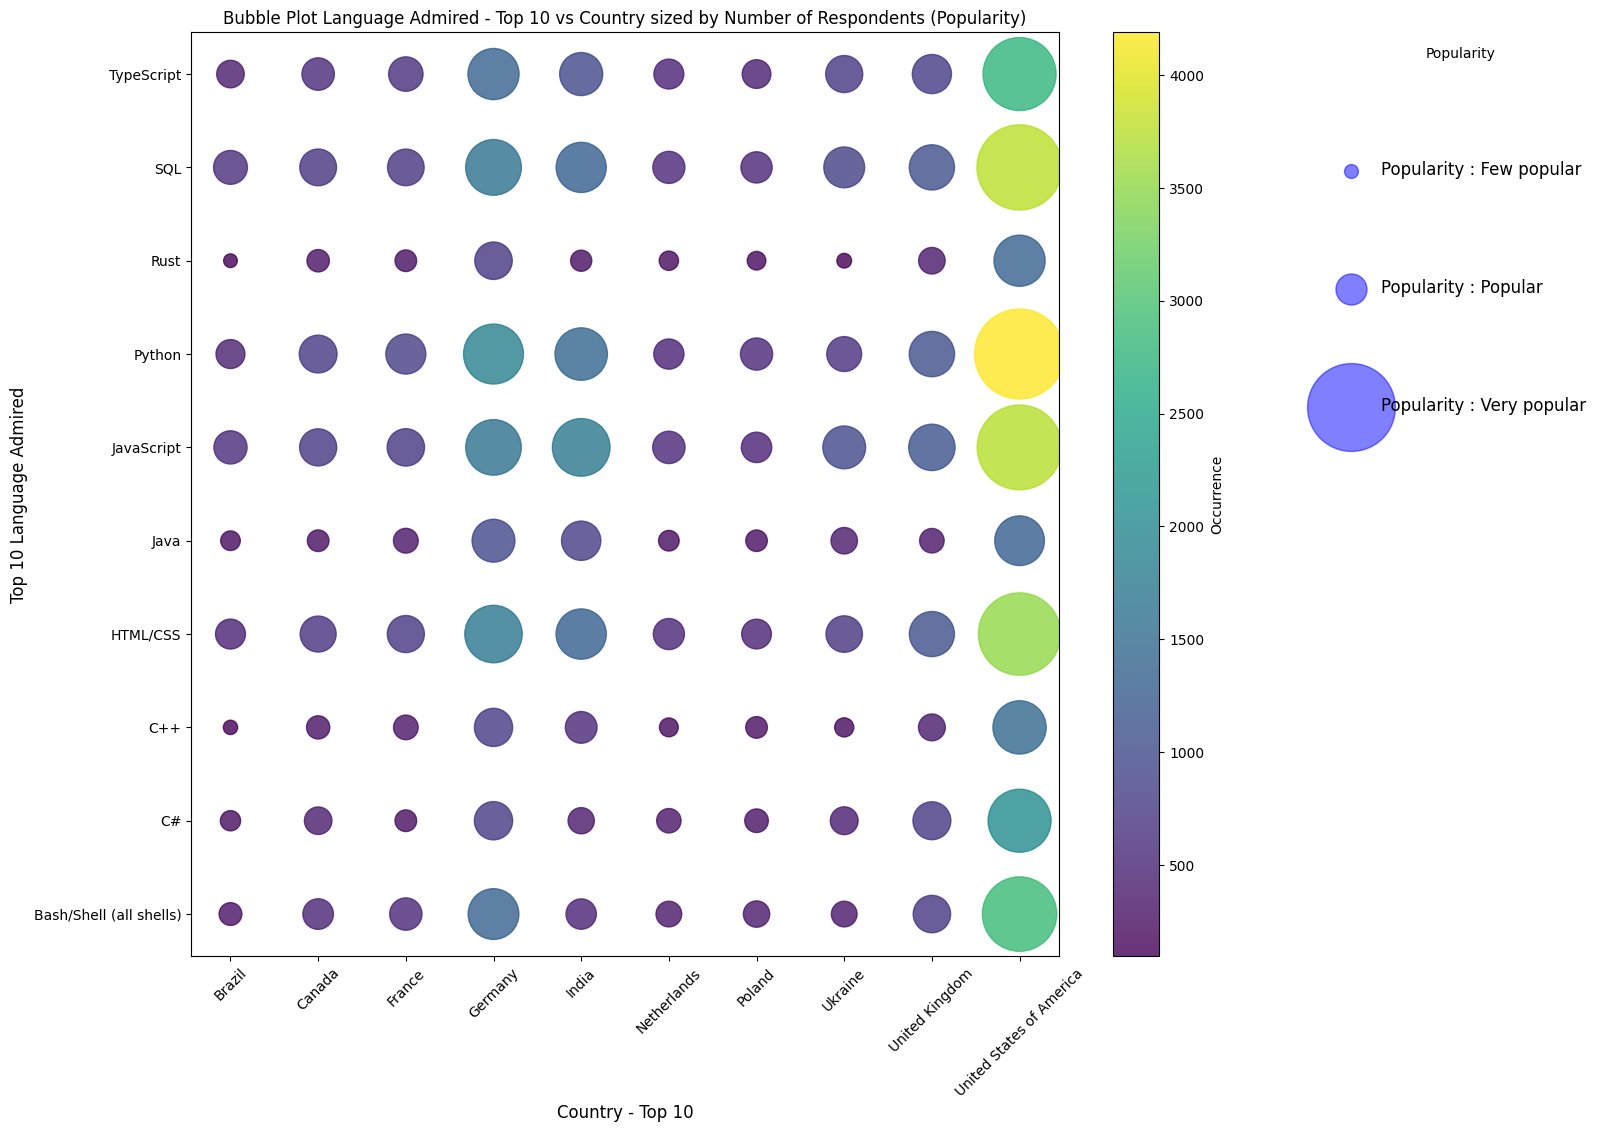

In [81]:
#bubble plot
plt.figure(figsize=(14, 12))
scatter = plt.scatter(df_admired_grouped['Country'], df_admired_grouped['LanguageAdmired'], 
                       s=df_admired_grouped['Frequency'], 
                       alpha=0.8, cmap='viridis', c=df_admired_grouped['Frequency'])

# color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Occurrence')
# Add a legend for bubble size
sizes = [100, 500, 4000]
labels = ['Few popular','Popular','Very popular']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size,c='blue', alpha=0.5, label=f'Popularity : {label}')

plt.legend(scatterpoints=1, frameon=False, labelspacing=6, title='Popularity',
           bbox_to_anchor=(1.3, 1), loc='upper left', fontsize=12)

plt.xlabel('Country - Top 10', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Top 10 Language Admired', fontsize=12)
plt.title('Bubble Plot Language Admired - Top 10 vs Country sized by Number of Respondents (Popularity)', fontsize=12)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
